<a href="https://colab.research.google.com/github/Venkat-Cherukuri/ACS---Team-13/blob/main/DV_1_Venkat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Venkat Cherukuri
Student ID: 02146190

Challange 1.1: Seaborn

In [1]:
import matplotlib.pyplot as plt  ## matplotlib is needed for the figure settings
import seaborn as sns            ## seabon library https://seaborn.pydata.org/
import pprint                    ## Helps printing lists and dictionaries in a more readable format

import altair as alt             ## Vega based python visualization library https://altair-viz.github.io/
from vega_datasets import data   ## Vega's datasetsZ

import pandas as pd                  ## Pandas library for loading and processing tabular data
from tqdm.notebook import tqdm as tq ## progress bar for lengthy loops

In [2]:
### https://seaborn.pydata.org/introduction.html
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


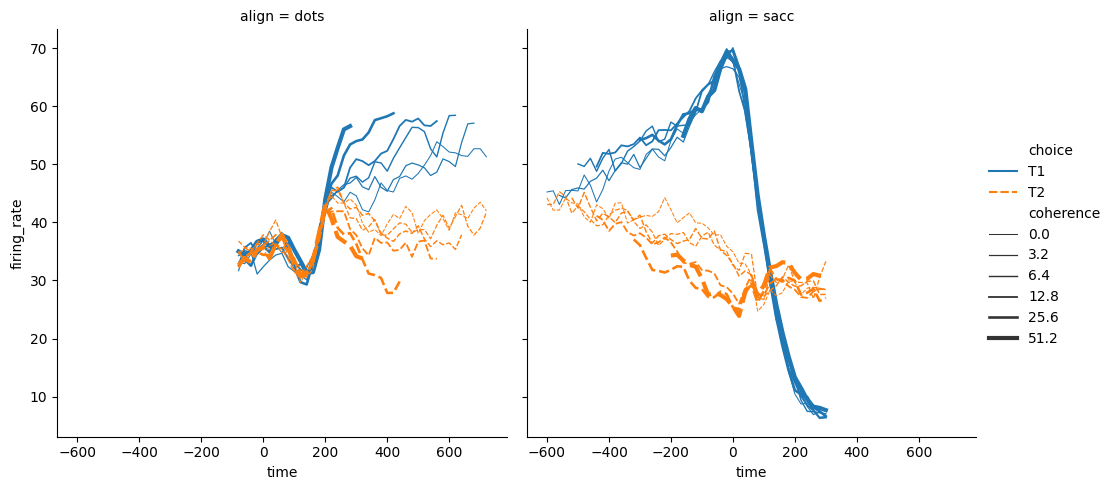

In [3]:
sns.relplot(x="time",                     ## x axis attr
            y="firing_rate",              ## y axis attr
            col="align",                  ## 1 variable for each column (each plots)
            hue="choice",                 ## color coding based on category
            size="coherence",             ## Size based on coherence column (attr)
            style="choice",               ## Style based on choice attr
            kind="line",                  ## relational line chart
            legend="full",                ## add all elements to legend
            data=dots);                   ## pandas dataframe: dots

In [6]:
source_links = ["https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2010.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2011.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2012.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2013.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2014.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2015.csv",
"https://raw.githubusercontent.com/umassdgithub/Age_State/main/D2016.csv"]
start_year = 2010
dfs = []
for i,link in tq(enumerate(source_links)):
  df_temp = pd.read_csv(link,skiprows=1) ## the first row is extra, so skip it
  df_temp["date"]= start_year + i        ## files are sorted by year of estimate
  dfs.append(df_temp)

df_ages_all = pd.concat(dfs)          ## returns 1 dataframe for all the dataframes in the list

df_ages = df_ages_all.copy()          ## Keep an original copy of the data
df_ages.head(4)

0it [00:00, ?it/s]

,id,Geographic Area Name,Female!!Estimate!!AGE!!15 to 19 years,Female!!Margin of Error!!AGE!!15 to 19 years,Female!!Estimate!!AGE!!20 to 24 years,Female!!Margin of Error!!AGE!!20 to 24 years,Female!!Estimate!!AGE!!25 to 29 years,Female!!Margin of Error!!AGE!!25 to 29 years,Female!!Estimate!!AGE!!30 to 34 years,Female!!Margin of Error!!AGE!!30 to 34 years,...,Total!!Estimate!!PERCENT ALLOCATED!!Age,Total!!Margin of Error!!PERCENT ALLOCATED!!Age,Male!!Estimate!!PERCENT ALLOCATED!!Sex,Male!!Margin of Error!!PERCENT ALLOCATED!!Sex,Male!!Estimate!!PERCENT ALLOCATED!!Age,Male!!Margin of Error!!PERCENT ALLOCATED!!Age,Female!!Estimate!!PERCENT ALLOCATED!!Sex,Female!!Margin of Error!!PERCENT ALLOCATED!!Sex,Female!!Estimate!!PERCENT ALLOCATED!!Age,Female!!Margin of Error!!PERCENT ALLOCATED!!Age
0,0400000US01,Alabama,6.8,0.1,7.0,0.2,6.4,0.1,6.1,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0400000US02,Alaska,7.3,0.4,7.7,0.4,7.3,0.2,6.8,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0400000US04,Arizona,6.9,0.1,6.6,0.1,6.7,0.1,6.4,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0400000US05,Arkansas,7.0,0.2,6.8,0.3,6.2,0.2,6.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#for col in df_ages.columns:
#  print(col)

In [ ]:
needed_cols = ["Geographic Area Name","date","Total!!Estimate!!Total population"] ## when working with the total population of each state only
for col in df_ages.columns:
  if "Total!!Estimate!!AGE" in col:
    needed_cols.append(col)
df_ages = df_ages[needed_cols]
new_col_names =["state","date","total"] + [col.split("!!")[3] for col in df_ages.columns[3:]]
df_ages.columns = new_col_names

In [10]:
df_ages

,state,date,total,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,40 to 44 years,45 to 49 years,50 to 54 years,55 to 59 years,60 to 64 years,65 to 69 years,70 to 74 years,75 to 79 years,80 to 84 years,85 years and over
0,Alabama,2010,4785298,6.4,6.5,6.7,7.3,7.1,6.4,6.2,...,6.6,7.2,7.2,6.5,5.8,4.3,3.4,2.6,1.8,1.6
1,Alaska,2010,713985,7.5,7.0,7.3,7.2,7.8,7.7,6.8,...,7.3,7.9,7.8,7.1,5.2,2.9,1.9,1.2,0.9,0.6
2,Arizona,2010,6413737,7.1,7.0,7.1,7.2,6.9,6.9,6.5,...,6.3,6.6,6.5,5.9,5.6,4.4,3.4,2.5,1.9,1.6
3,Arkansas,2010,2921606,6.7,6.7,6.9,7.2,6.8,6.4,6.2,...,6.3,6.9,7.0,6.2,5.9,4.6,3.5,2.6,2.0,1.8
4,California,2010,37349363,6.8,6.8,6.9,7.6,7.5,7.3,6.9,...,7.0,7.2,6.9,5.9,5.0,3.5,2.6,2.1,1.6,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Washington,2016,7288000,6.2,6.4,6.1,6.2,6.6,7.5,7.2,...,6.1,6.5,6.6,6.7,6.3,5.3,3.7,2.4,1.6,1.8
48,West Virginia,2016,1831102,5.6,5.6,5.8,6.2,6.3,6.0,5.8,...,6.3,6.4,6.9,7.4,7.1,6.5,4.6,3.3,2.0,2.3
49,Wisconsin,2016,5778709,5.8,6.2,6.3,6.6,7.0,6.2,6.4,...,5.7,6.3,7.2,7.4,6.6,5.4,3.8,2.7,2.0,2.2
50,Wyoming,2016,585501,6.5,7.5,6.4,6.4,6.5,6.9,6.9,...,6.1,5.7,6.1,6.7,7.1,5.2,3.9,2.5,1.6,1.7


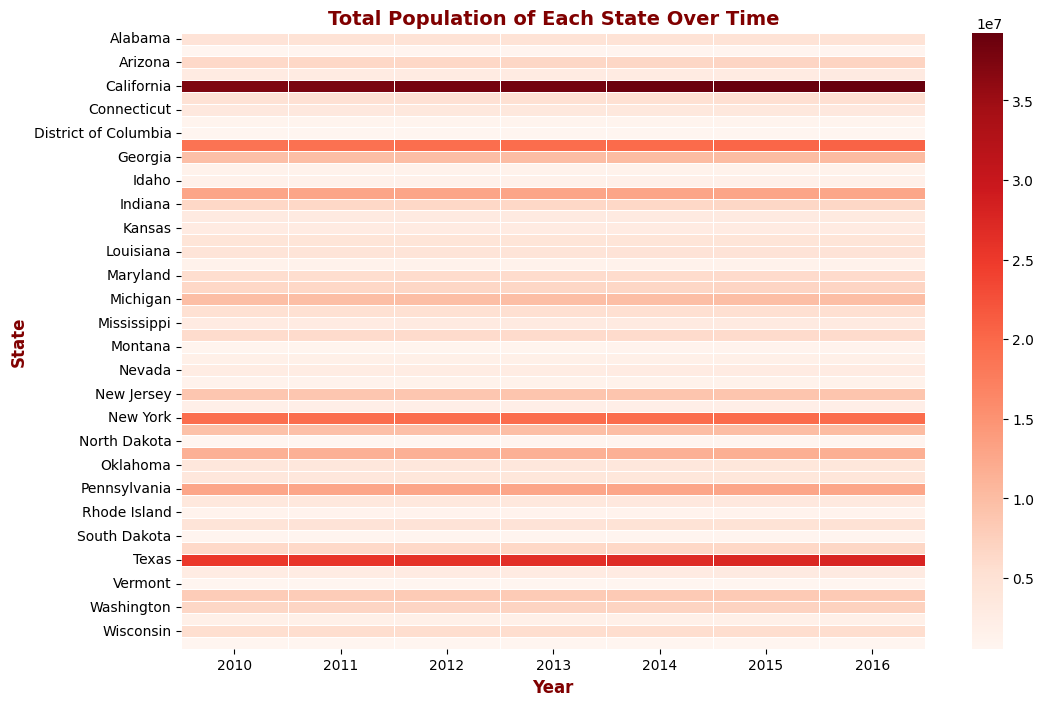

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the dataframe for heatmap format
df_pivot = df_ages.pivot(index="state", columns="date", values="total")

# Plot heatmap with MAROON color map
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="Reds", annot=False, linewidths=0.5)

# Customizing the title and labels
plt.title("Total Population of Each State Over Time", fontsize=14, fontweight='bold', color='maroon')
plt.xlabel("Year", fontsize=12, fontweight='bold', color='maroon')
plt.ylabel("State", fontsize=12, fontweight='bold', color='maroon')

# Show the plot
plt.show()


Challenge 1.2: Seaborn: Regenerating the same visualization

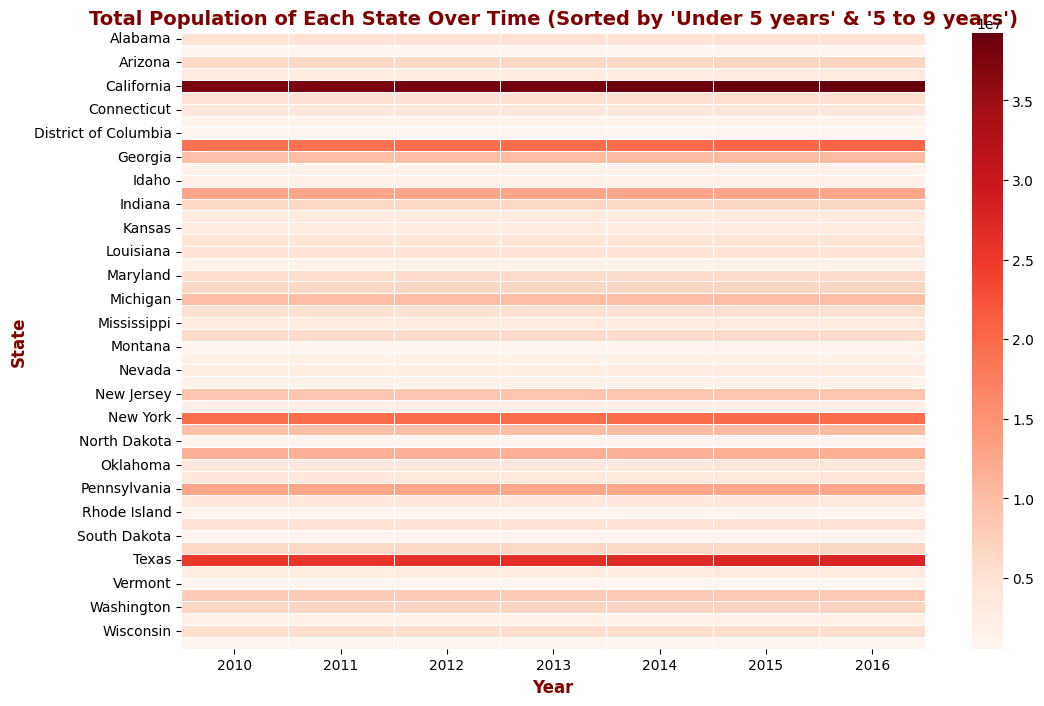

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort dataframe by "Under 5 years" and "5 to 9 years" in descending order
df_sorted = df_ages.sort_values(by=["Under 5 years", "5 to 9 years"], ascending=False)

# Pivot the dataframe for heatmap format
df_pivot = df_sorted.pivot(index="state", columns="date", values="total")

# Plot heatmap with MAROON color map
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="Reds", annot=False, linewidths=0.5)

# Customizing the title and labels
plt.title("Total Population of Each State Over Time (Sorted by 'Under 5 years' & '5 to 9 years')",
          fontsize=14, fontweight='bold', color='maroon')
plt.xlabel("Year", fontsize=12, fontweight='bold', color='maroon')
plt.ylabel("State", fontsize=12, fontweight='bold', color='maroon')

# Show the plot
plt.show()


Challenge 1.2: Seaborn: Sort by under 5 years and 5 -9 years in a descending format

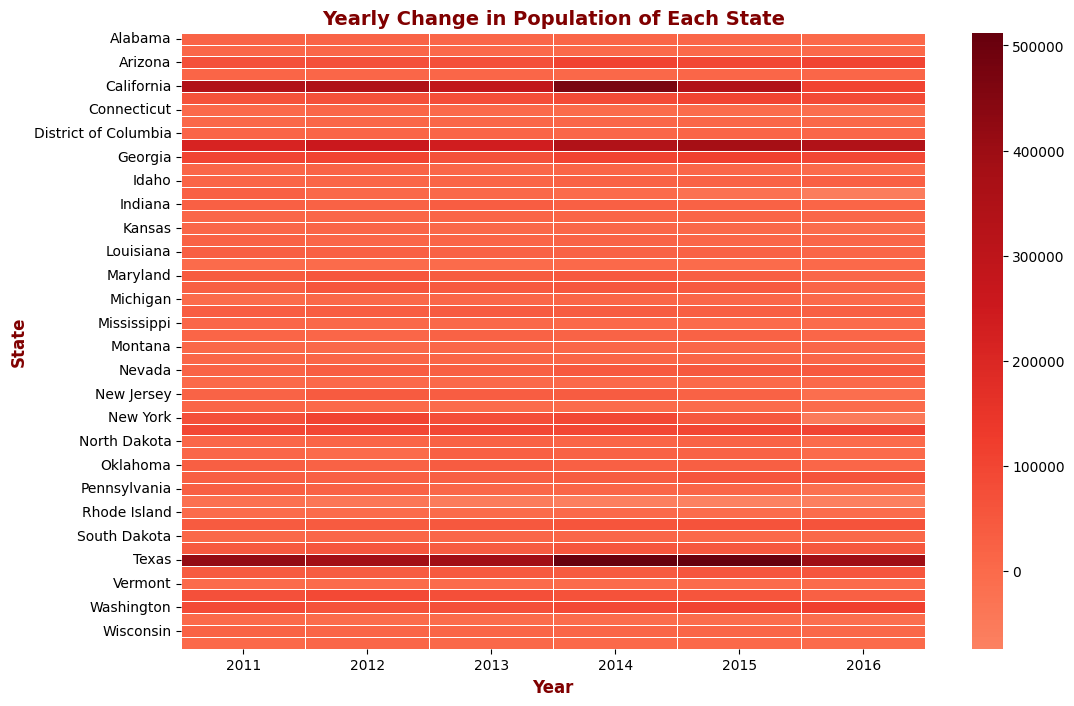

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the dataframe to get total population for each state per year
df_pivot = df_ages.pivot(index="state", columns="date", values="total")

# Compute the difference between consecutive years (Year-over-Year change)
df_diff = df_pivot.diff(axis=1).dropna(axis=1)  # Drop the first column since diff makes it NaN

# Plot heatmap with MAROON color map (for difference visualization)
plt.figure(figsize=(12, 8))
sns.heatmap(df_diff, cmap="Reds", annot=False, linewidths=0.5, center=0)

# Customizing the title and labels
plt.title("Yearly Change in Population of Each State", fontsize=14, fontweight='bold', color='maroon')
plt.xlabel("Year", fontsize=12, fontweight='bold', color='maroon')
plt.ylabel("State", fontsize=12, fontweight='bold', color='maroon')

# Show the plot
plt.show()


Challenge 2: Altair

In [24]:
import altair as alt
import pandas as pd

def plot_population_percentage_altair(df, year):
    """
    Creates an interactive 100% stacked bar chart using Altair
    to visualize the percentage distribution of age groups for each state.

    Parameters:
        df (DataFrame): The processed dataframe containing state-wise population data.
        year (int): The year for which the population percentage should be plotted.
    """
    # Filter data for the selected year
    df_year = df[df["date"] == year]

    # Drop total and date columns
    df_year = df_year.drop(columns=["total", "date"])

    # Normalize each state's population to get percentage
    df_percent = df_year.set_index("state").div(df_year.set_index("state").sum(axis=1), axis=0) * 100

    # Convert from wide to long format for Altair
    df_melted = df_percent.reset_index().melt(id_vars=["state"], var_name="Age Group", value_name="Percentage")

    # Create the Altair stacked bar chart
    chart = alt.Chart(df_melted).mark_bar().encode(
        x=alt.X("state:N", title="State", sort="-y"),
        y=alt.Y("Percentage:Q", title="Population Percentage", stack="normalize"),
        color=alt.Color("Age Group:N", legend=alt.Legend(title="Age Group")),
        tooltip=["state", "Age Group", "Percentage"]
    ).properties(
        width=900,
        height=500,
        title=f"Population Distribution by Age Group - {year}"
    ).configure_axis(
        labelAngle=90
    )

    return chart

# Example usage (Replace with desired year)
plot_population_percentage_altair(df_ages, 2015)  # Change year as needed


alt.Chart(...)

Challenge 3: Seaborn Matplotlib

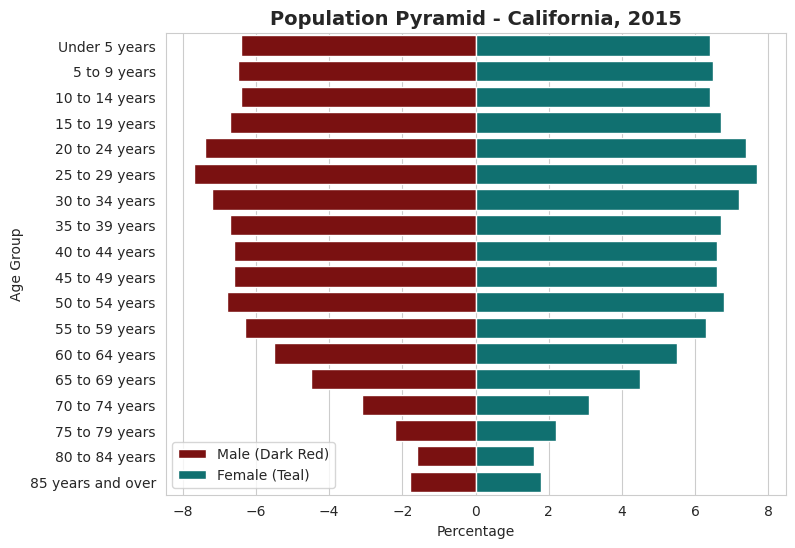

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_population_pyramid_seaborn(df, state, year):
    """
    Plots a population pyramid for a single state in a given year using Seaborn & Matplotlib.

    Parameters:
        df (DataFrame): The processed dataframe containing state-wise population data.
        state (str): The state to visualize.
        year (int): The year for which the population pyramid should be plotted.
    """
    # Filter data for the selected state and year
    df_state = df[(df["state"] == state) & (df["date"] == year)].copy()

    # Drop unnecessary columns
    df_state = df_state.drop(columns=["total", "date", "state"])

    # Transpose dataframe for proper structure
    df_state = df_state.T  # Now age groups are in the index
    df_state.columns = ["Population"]  # Rename column for clarity

    # Convert population numbers to percentage
    df_state["Percentage"] = (df_state["Population"] / df_state["Population"].sum()) * 100

    # Create "Male" and "Female" proxies (splitting population evenly)
    df_state["Male"] = -df_state["Percentage"]  # Negative for left-side bars
    df_state["Female"] = df_state["Percentage"]  # Positive for right-side bars

    # Set Seaborn style
    sns.set_style("whitegrid")

    # Plot population pyramid using Seaborn's barplot
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=df_state["Male"], y=df_state.index, color="#8B0000", label="Male (Dark Red)", ax=ax)
    sns.barplot(x=df_state["Female"], y=df_state.index, color="#008080", label="Female (Teal)", ax=ax)

    # Labels and title
    ax.set_xlabel("Percentage")
    ax.set_ylabel("Age Group")
    ax.set_title(f"Population Pyramid - {state}, {year}", fontsize=14, fontweight="bold")

    # Legend
    ax.legend()

    # Show the plot
    plt.show()

# Example usage:
plot_population_pyramid_seaborn(df_ages, "California", 2015)  # Change state and year as needed


Completing the missing parts

<ipython-input-27-3e5e3ef07b24>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_state.index, fontsize=6)
<ipython-input-27-3e5e3ef07b24>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_state.index, fontsize=6)
<ipython-input-27-3e5e3ef07b24>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_state.index, fontsize=6)
<ipython-input-27-3e5e3ef07b24>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_state.index, fontsize=6)
<ipython-input-27-3e5e3ef07b24>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

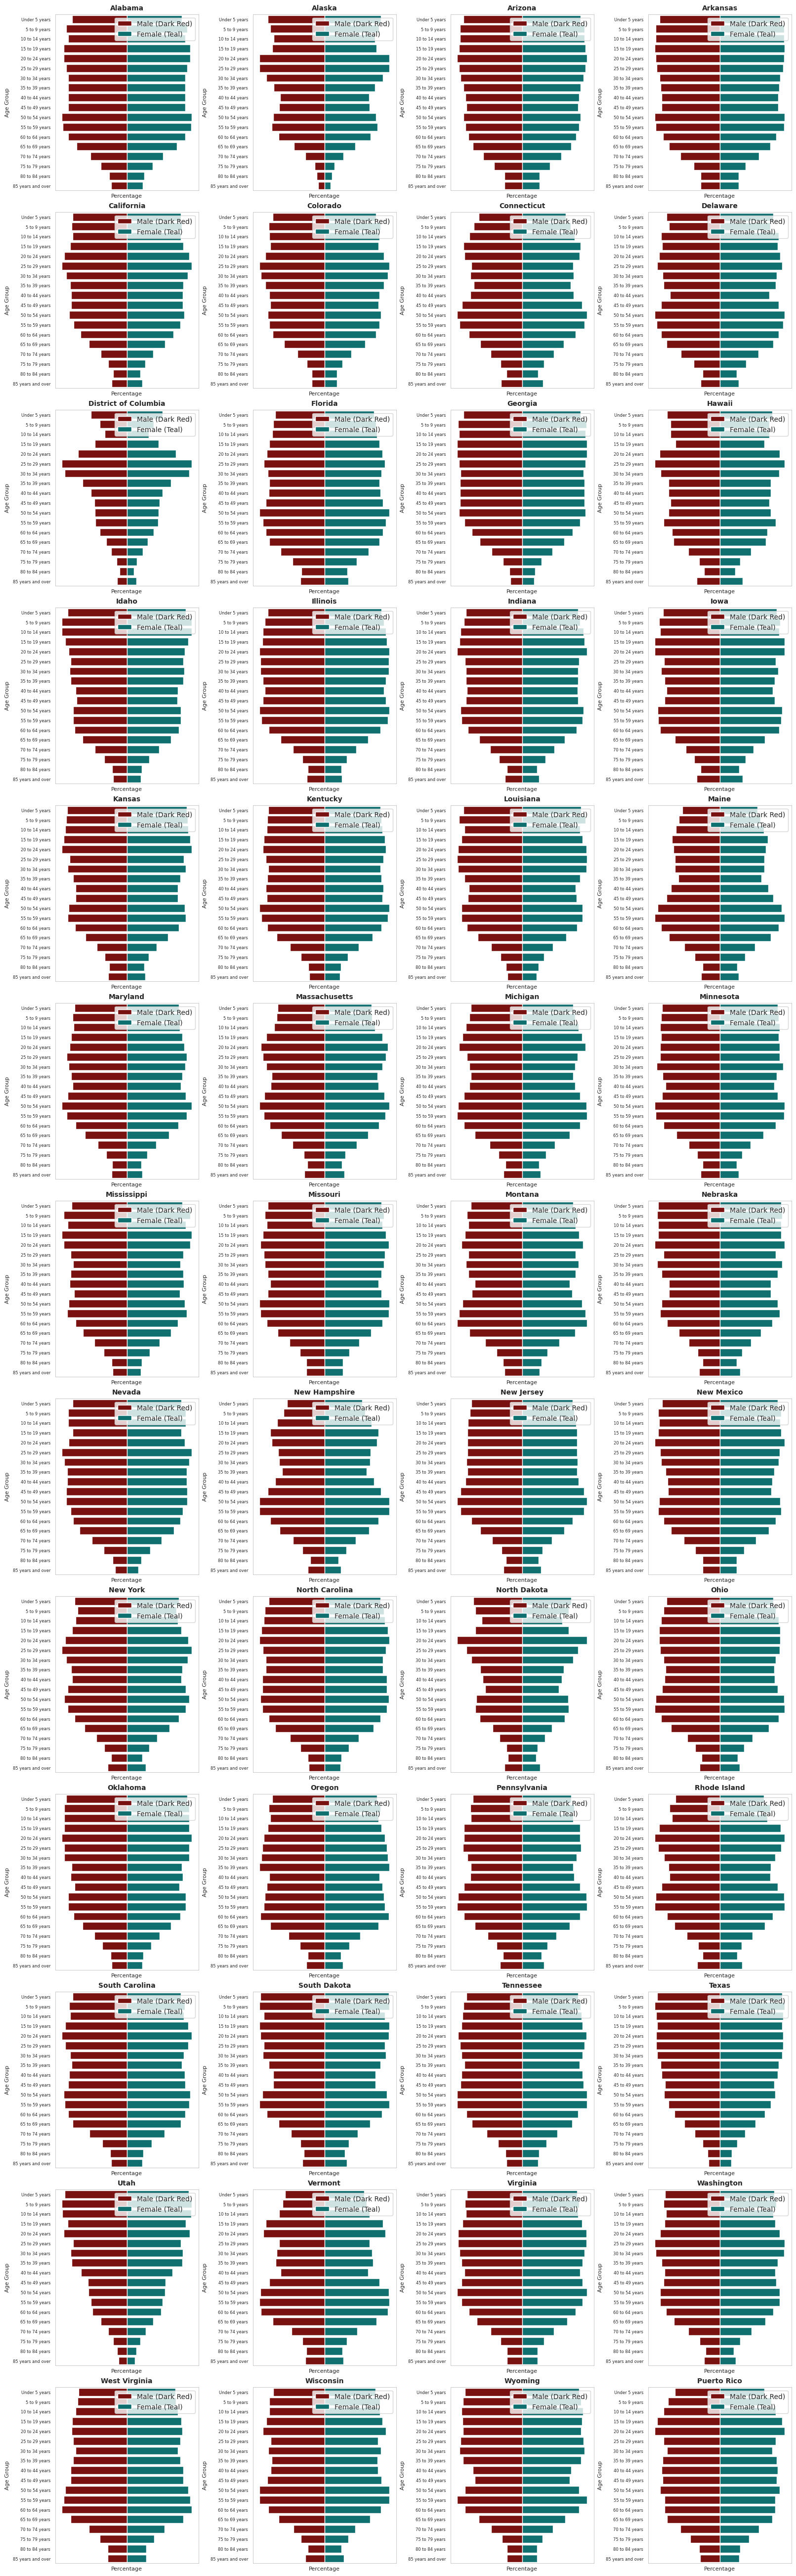

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

def plot_population_pyramids_all_states(df, year):
    """
    Plots population pyramids for all states in a given year using Seaborn & Matplotlib.

    Parameters:
        df (DataFrame): The processed dataframe containing state-wise population data.
        year (int): The year for which the population pyramids should be plotted.
    """
    # Get unique states
    states = df["state"].unique()
    num_states = len(states)

    # Define grid layout
    cols = 4  # Number of columns per row
    rows = math.ceil(num_states / cols)  # Number of rows needed

    # Set figure size dynamically
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), constrained_layout=True)

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, state in enumerate(states):
        # Filter data for the state and year
        df_state = df[(df["state"] == state) & (df["date"] == year)].copy()

        # Drop unnecessary columns
        df_state = df_state.drop(columns=["total", "date", "state"])

        # Transpose dataframe for proper structure
        df_state = df_state.T
        df_state.columns = ["Population"]

        # Convert population numbers to percentage
        df_state["Percentage"] = (df_state["Population"] / df_state["Population"].sum()) * 100

        # Create "Male" and "Female" proxies (splitting population evenly)
        df_state["Male"] = -df_state["Percentage"]
        df_state["Female"] = df_state["Percentage"]

        # Select the correct subplot
        ax = axes[i]

        # Plot pyramid using the custom color scheme
        sns.barplot(x=df_state["Male"], y=df_state.index, color="#8B0000", ax=ax, label="Male (Dark Red)")
        sns.barplot(x=df_state["Female"], y=df_state.index, color="#008080", ax=ax, label="Female (Teal)")

        # Titles and labels
        ax.set_title(state, fontsize=10, fontweight="bold")
        ax.set_xlabel("Percentage", fontsize=8)
        ax.set_ylabel("Age Group", fontsize=8)
        ax.set_xticks([])  # Remove x-ticks to reduce clutter
        ax.set_yticklabels(df_state.index, fontsize=6)

    # Hide any extra unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Show the full grid of population pyramids
    plt.show()

# Example usage (Change the year as needed)
plot_population_pyramids_all_states(df_ages, 2015)


Challenge 4: Matplotlib: Loading the Spotify data using pandas dataframe.

In [45]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [47]:
!ls /content/drive/MyDrive/



'Colab Notebooks'	      'POM 500 ASSIGNMENT 2.xlsx'       ProjectReport.gdoc
'Copy of ProjectReport.gdoc'  'pom homework 4 excel (1).xlsx'  'Untitled spreadsheet.gsheet'
 Data_Visualization	      'pom homework 4 excel.xlsx'


In [48]:
!ls /content/drive/MyDrive/Data_Visualization/


Spotify_Data.json


In [49]:
import pandas as pd

# Update the file path based on your folder structure
file_path = "/content/drive/MyDrive/Data_Visualization/Spotify_Data.json"

# Load the JSON file into a Pandas DataFrame
df = pd.read_json(file_path)

# Display first few rows to confirm data is loaded correctly
df.head(), df.columns


(                     ts                            platform  ms_played  \
 0  2021-09-04T10:12:23Z  Windows 10 (10.0.22000; x64; AppX)       7130   
 1  2021-09-04T10:16:20Z  Windows 10 (10.0.22000; x64; AppX)     237714   
 2  2021-09-04T10:17:08Z  Windows 10 (10.0.22000; x64; AppX)      47045   
 3  2021-09-04T10:19:41Z  Windows 10 (10.0.22000; x64; AppX)      32500   
 4  2021-09-04T10:22:57Z  Windows 10 (10.0.22000; x64; AppX)     197298   
 
   conn_country                         master_metadata_track_name  \
 0           LK                                  Broke In A Minute   
 1           LK                                            Bonnona   
 2           LK  Broken People (Originally Performed by Logic &...   
 3           LK                                             ブルーバード   
 4           LK                            The Bones - with Hozier   
 
   master_metadata_album_artist_name  \
 0                        Tory Lanez   
 1                            DJ JNK   
 2    

In [50]:
# Convert timestamp column to datetime format
df['ts'] = pd.to_datetime(df['ts'])

# Extract hour and month
df['hour'] = df['ts'].dt.hour
df['month'] = df['ts'].dt.month

# Display updated DataFrame with new columns
df.head()


,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp,incognito_mode,hour,month
0,2021-09-04 10:12:23+00:00,Windows 10 (10.0.22000; x64; AppX),7130,LK,Broke In A Minute,Tory Lanez,The New Toronto 3,spotify:track:4xqIYGwwZTEem9U8A42SPF,playbtn,endplay,False,False,1630750333278,False,10,9
1,2021-09-04 10:16:20+00:00,Windows 10 (10.0.22000; x64; AppX),237714,LK,Bonnona,DJ JNK,Bonnona,spotify:track:6ahGShWSkIHVoBd278gYnC,clickrow,trackdone,False,False,1630750341690,False,10,9
2,2021-09-04 10:17:08+00:00,Windows 10 (10.0.22000; x64; AppX),47045,LK,Broken People (Originally Performed by Logic &...,Covered Up,"Chart Backing Tracks 2017, Vol. 14",spotify:track:0MONybFd78nzNA7Au93yb2,trackdone,endplay,False,False,1630750578721,False,10,9
3,2021-09-04 10:19:41+00:00,Windows 10 (10.0.22000; x64; AppX),32500,LK,ブルーバード,Ikimonogakari,Chou Ikimonobakari Tennen Kinen Members Best S...,spotify:track:2XpV9sHBexcNrz0Gyf3l18,clickrow,endplay,False,False,1630750627276,False,10,9
4,2021-09-04 10:22:57+00:00,Windows 10 (10.0.22000; x64; AppX),197298,LK,The Bones - with Hozier,Maren Morris,The Bones,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,clickrow,trackdone,False,False,1630750779709,False,10,9


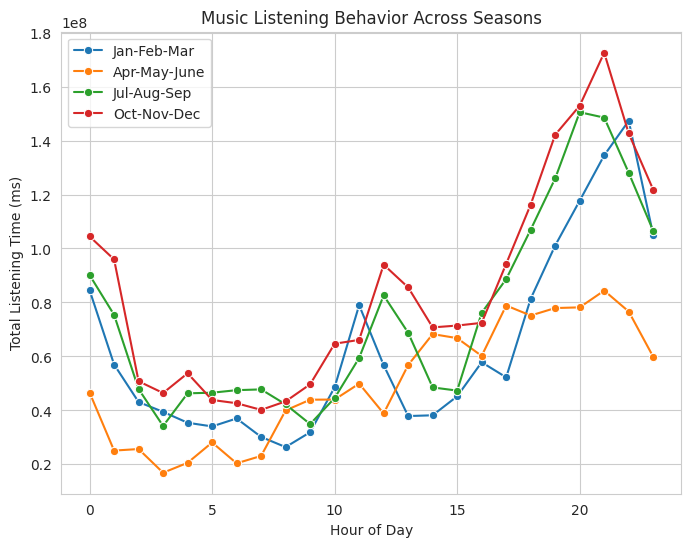

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define labels for 3-month periods
labels = ["Jan-Feb-Mar", "Apr-May-June", "Jul-Aug-Sep", "Oct-Nov-Dec"]

# Create figure and axis
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Loop through each 3-month period and plot the total listening time
for i, j in enumerate(range(1, 13, 3)):
    df_subset = df[df['month'].between(j, j + 2)]  # Filter for months in the range
    df_grouped = df_subset.groupby("hour")["ms_played"].sum().reset_index()  # Group by hour
    sns.lineplot(data=df_grouped, x="hour", y="ms_played", label=labels[i], marker="o", ax=ax)

# Labels and title
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total Listening Time (ms)")
ax.set_title("Music Listening Behavior Across Seasons")

# Show the plot
plt.legend(title=None)
plt.show()
